In [77]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [78]:
train_images.shape


(60000, 28, 28)

In [79]:
len(train_labels)

60000

In [80]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [81]:
test_images.shape

(10000, 28, 28)

In [82]:
len(test_labels)

10000

In [83]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

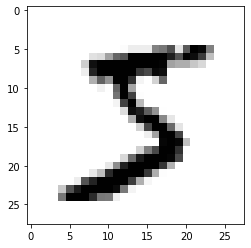

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

some_image = train_images[0]
plt.imshow(some_image, cmap = 'binary')

In [85]:
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)

In [86]:
test_images.shape, train_images.shape

((10000, 28, 28, 1), (60000, 28, 28, 1))

In [87]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization 
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

#98
network = models.Sequential()
network.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape=(28,28,1)))
network.add(BatchNormalization())

#99
network.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
network.add(BatchNormalization())

#100
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Dropout(.25)) 

#101
network.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
network.add(BatchNormalization())

#102
network.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))
network.add(Dropout(.25))

#103
network.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
network.add(BatchNormalization())
network.add(Dropout(.25))

#104
network.add(Flatten())
network.add(Dense(256, activation = 'relu'))
network.add(BatchNormalization())
network.add(Dropout(.25))

network.add(layers.Dense(10, activation = 'softmax'))
network.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
batch_normalization_30 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 64)        102464    
_________________________________________________________________
batch_normalization_31 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 64)       

In [88]:
network.compile(optimizer = RMSprop(lr=.001,rho = .9, epsilon = 1e-8, decay = 0), loss = 'categorical_crossentropy', metrics = ['accuracy'])



In [89]:
learn_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor=.5,min_lr = 0.0)

In [90]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [91]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [92]:
history = network.fit(partial_x_train, partial_y_train, epochs = 5, batch_size = 32, validation_data = (x_val, y_val))

Epoch 1/5
1563/1563 [==============================] - 227s 145ms/step - loss: 0.1316 - accuracy: 0.9587 - val_loss: 0.0754 - val_accuracy: 0.9800
Epoch 2/5
1563/1563 [==============================] - 228s 146ms/step - loss: 0.0549 - accuracy: 0.9838 - val_loss: 0.0356 - val_accuracy: 0.9897
Epoch 3/5
1563/1563 [==============================] - 225s 144ms/step - loss: 0.0418 - accuracy: 0.9877 - val_loss: 0.0306 - val_accuracy: 0.9905
Epoch 4/5
1563/1563 [==============================] - 220s 141ms/step - loss: 0.0344 - accuracy: 0.9899 - val_loss: 0.0370 - val_accuracy: 0.9902
Epoch 5/5
1563/1563 [==============================] - 223s 143ms/step - loss: 0.0306 - accuracy: 0.9911 - val_loss: 0.0303 - val_accuracy: 0.9916


In [93]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 8s 26ms/step - loss: 0.0236 - accuracy: 0.9940
test_acc: 0.9940000176429749


In [94]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

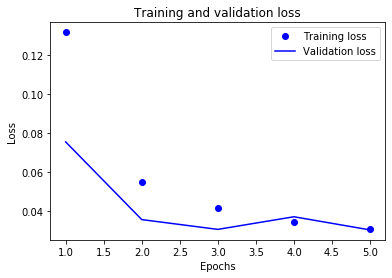

In [95]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

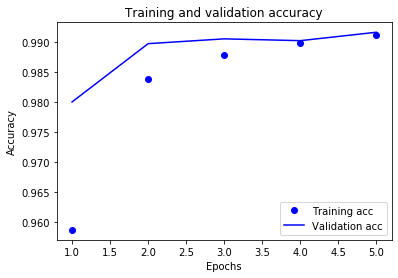

In [96]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()